In [2]:
import numpy as np 
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator,load_img
from keras.utils.all_utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os                                               #os. getcwd() To find out your current working directory 


In [3]:
Image_Width = 120
Image_Height = 120
Image_Size =(Image_Width,Image_Height)
Image_Channels =3

In [4]:
filenames=os.listdir("cat vs dog")
categories=[]
for f_name in filenames:
    category=f_name.split('.')[0]
    if category=='dog':
        categories.append(1)
    else:
        categories.append(0)
df=pd.DataFrame({
    'filename':filenames,
    'category':categories
})

In [5]:
df.head()

,filename,category
0,cat.1.jpg,0
1,cat.10.jpg,0
2,cat.100.jpg,0
3,cat.1000.jpg,0
4,cat.1001.jpg,0


In [6]:
df.tail()

,filename,category
8001,dog.996.jpg,1
8002,dog.997.jpg,1
8003,dog.998.jpg,1
8004,dog.999.jpg,1
8005,_DS_Store,0


In [7]:
df.shape

(8006, 2)

In [8]:
a = [i for i in df['filename'] if not i.endswith('.jpg') ]
a

['_DS_Store']

In [9]:
np.where(df['filename']=='_DS_Store')

(array([8005], dtype=int64),)

In [10]:
df = df.drop(df.index[8005])

In [11]:
df.shape

(8005, 2)

In [12]:
df = df.sample(frac=1,random_state=40)
df.head()

,filename,category
7059,dog.3750.jpg,1
3627,cat.663.jpg,0
6159,dog.2941.jpg,1
341,cat.1305.jpg,0
3705,cat.733.jpg,0


In [13]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout,Activation,BatchNormalization

In [14]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(Image_Width,Image_Height,Image_Channels)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2,activation='softmax'))
model.compile(loss='categorical_crossentropy',
             optimizer='rmsprop',metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 118, 118, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 118, 118, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 59, 59, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 59, 59, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 57, 57, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 57, 57, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 28, 28, 64)        0

In [16]:
from keras.callbacks import EarlyStopping,ReduceLROnPlateau
earlyStop = EarlyStopping(patience=10)
learining_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',patience=2,verbose=1,factor= 0.5,min_lr=0.00001)
callbacks = [earlyStop,learining_rate_reduction]

In [17]:
df['category']=df['category'].replace({0:'cat',1:'Dog'})
train_df,validate_df = train_test_split(df,test_size=0.20,
                                        random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df=validate_df.reset_index(drop=True)
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size=15

In [18]:
total_train,total_validate

(6404, 1601)

In [19]:
train_datagen = ImageDataGenerator(rotation_range=15,
                                rescale=1./255,
                                shear_range=0.1,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                width_shift_range=0.1,
                                height_shift_range=0.1
                                )
train_generator = train_datagen.flow_from_dataframe(train_df,
                                                 "cat vs dog",x_col='filename',y_col='category',
                                                 target_size=Image_Size,
                                                 class_mode='categorical',
                                                 batch_size=batch_size)
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe( validate_df,
                                                              "cat vs dog",
                                                              x_col='filename',
                                                              y_col='category',
                                                              target_size=Image_Size,
                                                              class_mode='categorical',
                                                              batch_size=batch_size)
    


Found 6404 validated image filenames belonging to 2 classes.
Found 1601 validated image filenames belonging to 2 classes.


In [130]:
epochs = 10 
history = model.fit_generator(train_generator,
                              epochs=epochs,
                              validation_data=validation_generator,
                              validation_steps=total_validate//batch_size,
                              steps_per_epoch = total_train//batch_size,
                              callbacks= callbacks
                             )

C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
426/426 [==============================] - 168s 393ms/step - loss: 0.5565 - accuracy: 0.7223 - val_loss: 0.5278 - val_accuracy: 0.7283
Epoch 2/10
426/426 [==============================] - 201s 472ms/step - loss: 0.5299 - accuracy: 0.7421 - val_loss: 0.5044 - val_accuracy: 0.7497
Epoch 3/10
426/426 [==============================] - 179s 419ms/step - loss: 0.5073 - accuracy: 0.7532 - val_loss: 0.4624 - val_accuracy: 0.7818
Epoch 4/10
426/426 [==============================] - 166s 391ms/step - loss: 0.4945 - accuracy: 0.7682 - val_loss: 0.4012 - val_accuracy: 0.8082
Epoch 5/10
426/426 [==============================] - 173s 406ms/step - loss: 0.4794 - accuracy: 0.7756 - val_loss: 0.6880 - val_accuracy: 0.7006
Epoch 6/10
426/426 [==============================] - 173s 407ms/step - loss: 0.4734 - accuracy: 0.7806 - val_loss: 0.4786 - val_accuracy: 0.7843

Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 7/10
426/426 [=======================

In [143]:
#plt.plot(train_generator,total_validate//batch_size)

In [20]:
model.save("model_catsVSdogs_10epoch.h5")

In [21]:
from keras.models import load_model
model = load_model('model_catsVSdogs_10epoch.h5')

In [22]:
test_filenames = os.listdir("cat dog test")
test_df = pd.DataFrame({'filename':test_filenames})
nb_samples = test_df.shape[0]

In [23]:
test_df.head()

,filename
0,cat.4001.jpg
1,cat.4002.jpg
2,cat.4003.jpg
3,cat.4004.jpg
4,cat.4005.jpg


In [24]:
test_datagen = ImageDataGenerator(rotation_range=15,
                                rescale=1./255,
                                shear_range=0.1,
                                zoom_range=0.2,
                                horizontal_flip=True,
                                width_shift_range=0.1,
                                height_shift_range=0.1)

test_generator = train_datagen.flow_from_dataframe(test_df,
                                                 "cat dog test",x_col='filename',y_col=None,
                                                 target_size=Image_Size,
                                                 class_mode=None,
                                                 batch_size=batch_size)

Found 2023 validated image filenames.


In [25]:
predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))

C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py:1976: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [26]:
test_df['category'] = np.argmax(predict, axis=-1)
label_map = dict((v,k) for k,v in train_generator.class_indices.items())
test_df['category'] = test_df['category'].replace(label_map)
test_df['category'] = test_df['category'].replace({ 'Dog': 1, 'cat': 0 })



In [27]:
sample_test = test_df.head(18)
sample_test.head()


,filename,category
0,cat.4001.jpg,1
1,cat.4002.jpg,1
2,cat.4003.jpg,1
3,cat.4004.jpg,1
4,cat.4005.jpg,1


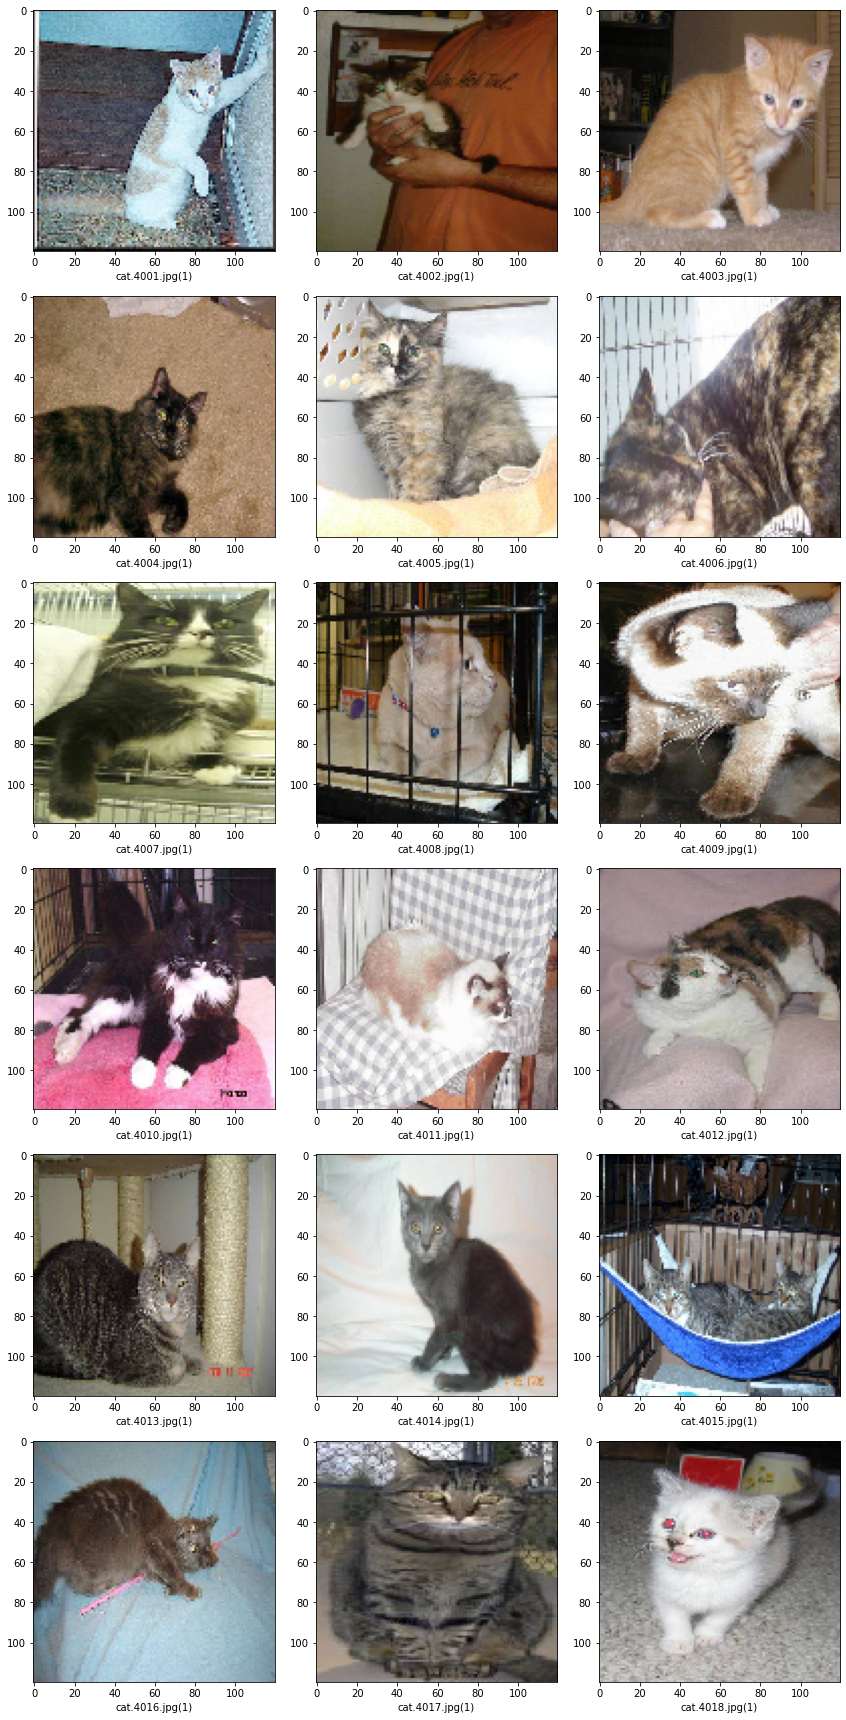

In [28]:
sample_test = test_df.head(18)
plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['category']
    img = load_img("cat dog test/"+filename, target_size=Image_Size)
    plt.subplot(6, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')' )
plt.tight_layout()
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


0 Dog


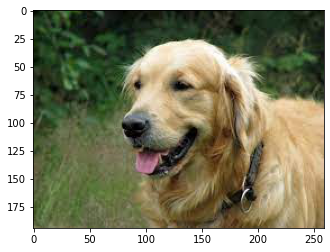

In [29]:
results={
    1:'Cat',
    0:'Dog'
}
from PIL import Image
import numpy as np
im=Image.open("download.png")
plt.imshow(im)
im=im.resize(Image_Size)
im=np.expand_dims(im,axis=0)
im=np.array(im)
im=im/255
pred=model.predict_classes([im])[0]
print(pred,results[pred])
